<a href="https://colab.research.google.com/github/IOlivaresPalma/Multimedia-Trabajos/blob/main/Actividad_4_OlivaresIvan_197615435.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>

</center></h1>
<font size="6"><center>
EIE 401
PROCESAMIENTO DIGITAL MULTIMEDIA
</center></font>


<center><h2>Actividad 4</h2></center>
<center><h3>Audio</h3></center>
<center><h3>Profesor: Jorge Cardenas</h3></center>

<center><h3>Por: Iván Olivares Palma</h3></center>
<center><h5>Pontificia Universidad Catolica de Valparaiso</h5></center>


## 1. Realiza la operación de convolución

<p align="justify">
Una de las operaciones más comunes en tratamiento de imagenes, video etc, es la convolución. Comienza por realizar una convolución entre una señal Pulso y una función impulso filtrada.


<center><img src="../../assets/scipy-signal-convolution.png"/></center>


In [3]:
# Se comienza definiendo las funciones a trabajar
from scipy import signal
import numpy as np
from matplotlib.pyplot import plot


def convolucion(signal_1, signal_2):
    # Obtener la longitud de las señales
    len_signal_1 = len(signal_1)
    len_signal_2 = len(signal_2)

    # Calcular la longitud de la salida de la convolución
    len_output = len_signal_1 + len_signal_2 - 1

    # Inicializar el arreglo de salida
    output = [0] * len_output

    # Realizar la convolución
    for i in range(len_signal_1):

        for j in range(len_signal_2):
            output[i + j] += signal_1[i] * signal_2[j]

    return output

#Creacion de funciones...
def impulso_cuadrado(t, t_inicio, t_final):
    return np.where((t >= t_inicio) & (t <= t_final), 1.0, 0.0)

def impulso_gaussiano(t, sigma):
    return np.exp(-(t**2) / (2 * sigma**2)) / (np.sqrt(2 * np.pi) * sigma)


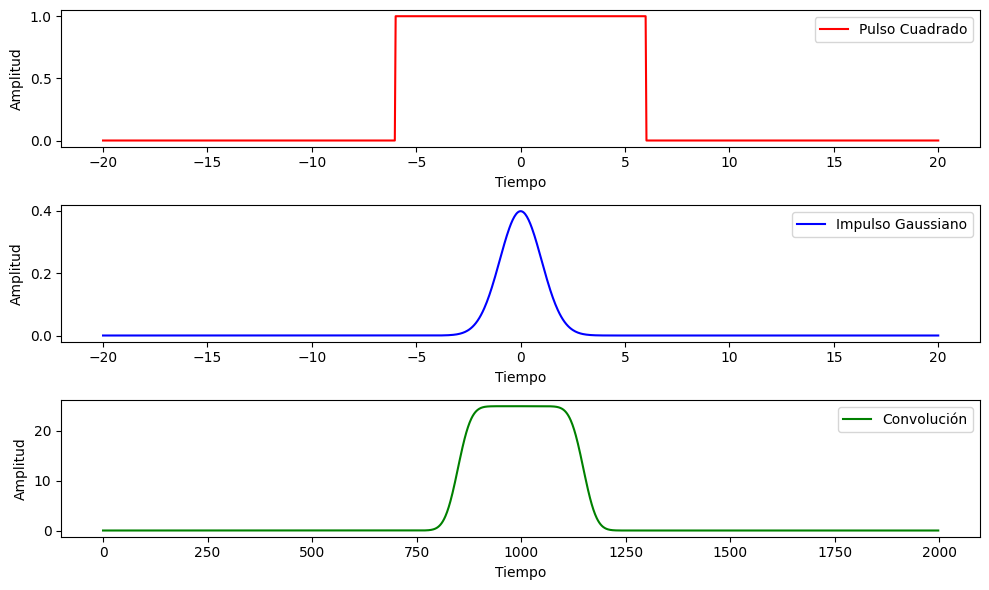

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve

# Definir el intervalo de tiempo
t = np.linspace(-20, 20, 1000)

# Definir la señal pulso cuadrado
pulso_cuadrado = impulso_cuadrado(t, -6, 6)

# Definir la función impulso gaussiano
sigma = 1.0
impulso_gauss = impulso_gaussiano(t, sigma)


conv = convolucion(pulso_cuadrado,impulso_gauss)
# Graficar las señales y la convolución resultante

#fig,(ax1,ax2,ax3) = subplots((3,1),figsize=())

plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(t, pulso_cuadrado, 'r', label='Pulso Cuadrado')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, impulso_gauss, 'b', label='Impulso Gaussiano')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(conv, 'g', label='Convolución')
plt.xlabel('Tiempo')
plt.ylabel('Amplitud')
plt.legend()

plt.tight_layout()
plt.show()


## 2. Cancelación de Ruido (Denoising)
<p align="justify">
Implementa un algoritmo para eliminar el ruido de una señal. Puedes apoyarte en esta referencia (https://www.youtube.com/watch?v=s2K1JfNR7Sc)

1. Debes tener la señal original
2. Debes agregar ruido a la señal
3. Obtener el valor medio de la señal con ruido
4. Implementar transformaciones y filtrado.
    


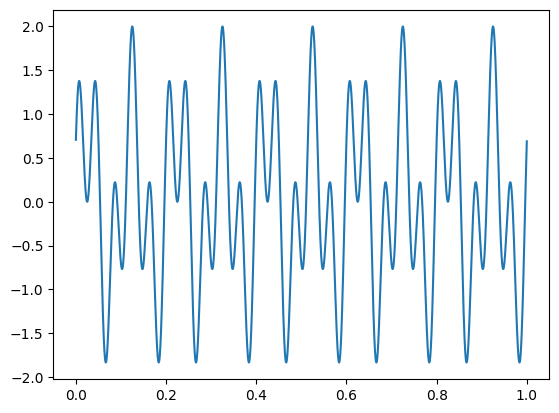

In [26]:
#Generar señal original
import numpy as np
import matplotlib.pyplot as plt

dt = 0.0001
tiempo = np.arange(0,1,dt)

#Señal
f = 10
f2 = 25
fase = np.pi/4
funcion = np.sin(2*np.pi*tiempo*f) + 1*np.sin(2*np.pi*tiempo*f2+ fase)

fig,ax = plt.subplots()
ax.plot(tiempo,funcion)

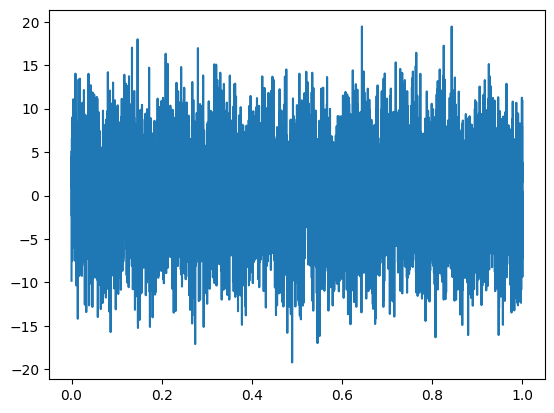

In [30]:
# Añadir ruido a la señal

f_noise = funcion + 5*np.random.randn(len(tiempo))

fig,ax1 = plt.subplots()
ax1.plot(tiempo,f_noise)

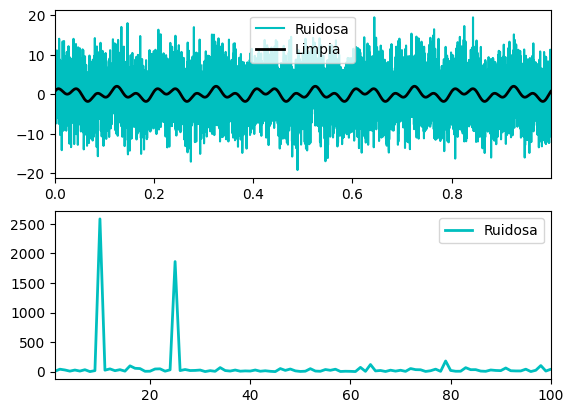

In [31]:
#Se calcula la fft

n = len(tiempo)
fhat = np.fft.fft(f_noise,n)
PSD = fhat*np.conj(fhat)/n
freq = (1/(dt*n))*np.arange(n)
L = np.arange(1,np.floor(n/2),dtype='int')

fig,axs = plt.subplots(2,1)
plt.sca(axs[0])
plt.plot(tiempo,f_noise,color='c',linewidth=1.5,label='Ruidosa')
plt.plot(tiempo,funcion,color='k',linewidth=2,label='Limpia')
plt.xlim(tiempo[0],tiempo[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(freq[L],PSD[L],color='c',linewidth=2,label='Ruidosa')
plt.xlim(freq[L[0]],100)
plt.legend()


In [33]:
indices = PSD>500
PSDlimpio = PSD*indices
fhat = indices*fhat
ffiltrada = np.fft.ifft(fhat)

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


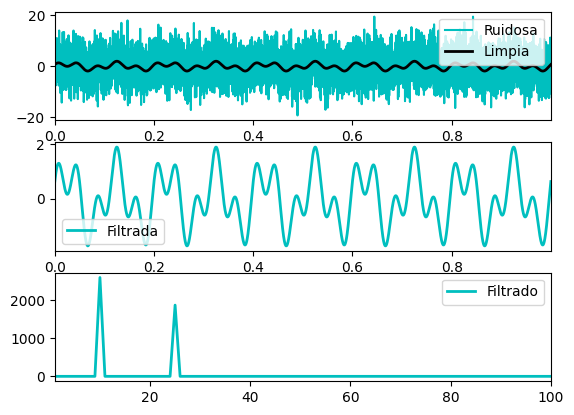

In [34]:
fig,axs = plt.subplots(3,1)
plt.sca(axs[0])
plt.plot(tiempo,f_noise,color='c',linewidth=1.5,label='Ruidosa')
plt.plot(tiempo,funcion,color='k',linewidth=2,label='Limpia')
plt.xlim(tiempo[0],tiempo[-1])
plt.legend()

plt.sca(axs[1])
plt.plot(tiempo,ffiltrada,color='c',linewidth=2,label='Filtrada')
plt.xlim(tiempo[0],tiempo[-1])
plt.legend()

plt.sca(axs[2])
plt.plot(freq[L],PSDlimpio[L],color='c',linewidth=2,label='Filtrado')
plt.xlim(freq[L[0]],100)
plt.legend()

## 3. Wavelets
### 3.1 Desarrolla una transformada wavelet 1D
<p align="justify">
Implementa transformaciones con 1-D wavelet usando la función Mexican Hat Wavelet.

$$m(x) = \frac{2}{\sqrt{3 \sigma} \pi^{\frac{1}{4}}} \left(1-\frac{x^2}{\sigma^2}\right) e^{\frac{-x^2}{2 \sigma^2}}$$


In [35]:
import numpy as np
import matplotlib.pyplot as plt

def mexican_hat(x, mu, sigma):
    m = ((2)/(np.sqrt(3*sigma)*(np.pi)**0.25))*(1-(x**2/sigma**2))*np.exp(-x**2/(2*sigma**2))
    return m


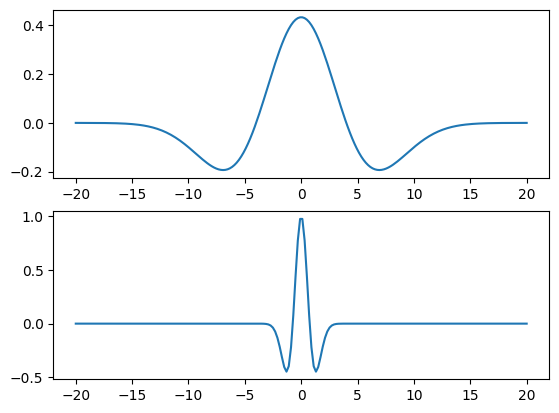

In [37]:
#Graficar wavelet

x = np.linspace(-20,20,200)

sigma1 = 4
sigma2 = 0.75

m1 = mexican_hat(x,1,sigma1)

m2 = mexican_hat(x,1,sigma2)


fig,(ax1,ax2) = plt.subplots(2)
ax1.plot(x,m1)
ax2.plot(x,m2)



### 3.2 Escribe un algoritmo para calcular la transformada discreta
<p align="justify">
En cierta forma se trata solo de aplicar al sumatoria sobre una señal que tengas (obviamente debes definir una señal de estudio, con ruido o que tenga varías frecuencias involucradas).

Debes hacerlo solo para un nivel (level). Recuerda que la transformada trabaja por niveles y puede ser dispendioso. En este caso de debe considerar que $$a_0=2$$ y $$b_0=1$$, así como también debe asumir un valor específico para _m_.

En teoría, la transformada es como sigue:

$$ (T^{\text{wav}} f)(a,b) = \sqrt{|a|} \int dt \; f(t) \psi \left(\frac{t-b}{a}\right) $$

$a = a_0^m$ and $b = n b_0 a_0^m$

Aquí a y b son parámetros para la escala y posición de la wavelet. Esto se puede escribir de forma discreta de tal forma que puedas asignar una posición y escala a la onda asignando los valores que quieres, pero en este caso usarás $$a_0=2$$ y $$b_0=1$$.

$$ (T^{\text{wav}} f)(a,b) = T^\text{wav}_{m,n}(f) = \int dt \; f(t) \psi_{m,n} (x) $$
con
$$ \psi_{m,n} = a_0^{\frac{-m}{2}} \psi\left(a_0^{-m}x - nb_0\right) $$

### Recuerda que la integral se convierte en una sumatoria.

###  3.2.1. Explica el siguiente fragmento de código en detalle

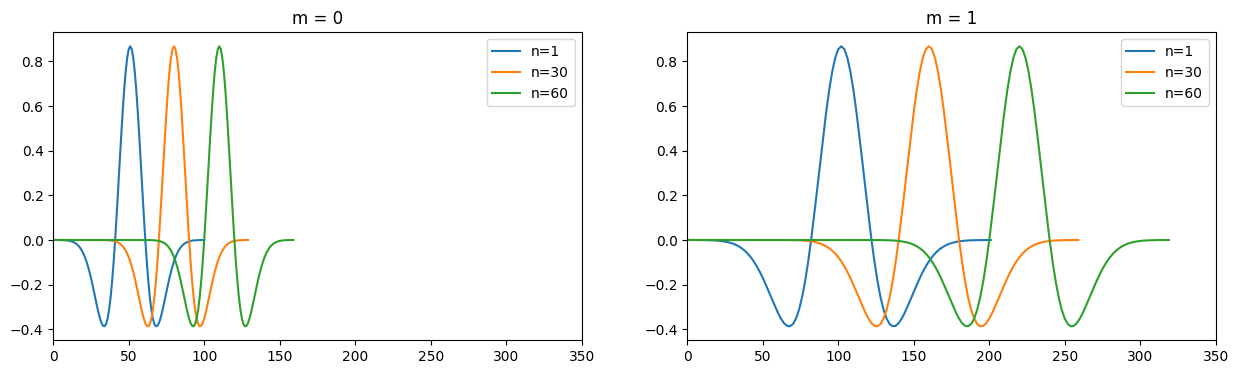

In [38]:
# we assume a0 = 2 and b0 = 1
# These are the scaling and translation factors
#using just o pair, means an specific wavelet
def psi_mn(psi, m, n):
    a = 2**m
    b = n*2**m
    wav = np.zeros(len(psi)*a + b)
    wav[b:b+len(psi)*a] = np.interp(np.arange(len(psi)*a)/a,np.arange(len(psi)),psi)
    return wav

psi = mexican_hat(np.arange(-5,5,0.1),0,1)
xlim = (0,350)
ns = [1, 30, 60]
ms = [0, 1]
plt.figure(figsize=(15,4))
plt.subplot(121)

for mi in range(len(ms)):
    m = ms[mi]
    plt.subplot(1,len(ms),mi+1)
    for n in ns:
        plt.plot(psi_mn(psi, m, n), label="n="+str(n))
    plt.title("m = "+str(m))
    plt.legend(loc="best")
    plt.xlim(xlim)
plt.show()

El código presenta un ejemplo de cómo se pueden visulizar y generar las wavelets con escalado y traslado. Se siguen los siguientes pasos:



1.   Se define la función psi_mn donde se calculan los parametros de escala y traslado de la wavelet a y b respectivamente.
2.   La función retorna la wavelet con los cambios realizados
3.   Se define la wavelet con la función creada en el punto anterior y se guarda en la variable psi.
4.   se definen los limites en x junto con los cambios que se realizarán a la wavelet
5.   Se realiza un bucle que recorre los distintos valores entregados para m y n y se grafican las wavelets resultantes



### 3.2.2 completa el siguiente código para realizar la transformada


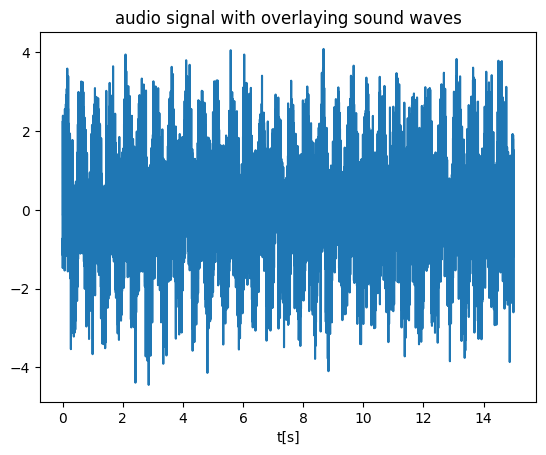

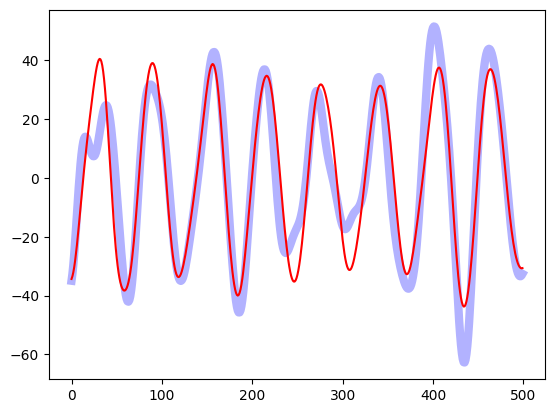

In [40]:

"""Transformed considering the sum over the section under study"""
def twav_mn(f, psi, m, n):
    f_scaled = f[::2**m]
    return 2**(m/2.0) * np.sum(f_scaled[n:n+len(psi)] * psi)

"""Naive Transform adding over the whole length"""

def twav_mn_naive(f, psi, m, n):
    pmn = psi_mn(psi, m, n)
    transform = 2**(-m/2.0) * np.sum(f[:len(pmn)] * pmn)
    return transform


m = 3 #single value for m
ns = np.arange(1000,1500)
res=1000 #resolution
freq=2 #frequency
"""Creating a wave to analyse"""
x = np.arange(0,15000,1) # Produces [0, 100) with steps of 2.
noise = np.random.normal(0,1, len(x)) #  μ = 0, σ = 2, size = length of x or y. Choose μ and σ wisely.
#adding noise
audio=np.sin(np.arange(15000)*2*np.pi*freq/res)+noise


transformed_sweept=[twav_mn(audio, psi, m, n) for n in ns]
naive_transformed_sweept=[twav_mn_naive(audio, psi, m, n) for n in ns]

plt.plot(np.arange(len(audio),dtype="float32")/res,audio)
plt.xlabel("t[s]")
plt.title("audio signal with overlaying sound waves")
plt.show()



plt.plot(transformed_sweept,color="blue", lw=6, alpha=0.3)
plt.plot(naive_transformed_sweept, "r-")
plt.show()

### 3.2 Wavelet usando librería
<p align="justify">
Usa la librería PyWavelets (pywt) con los datos provenientes del dataset  = "http://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat". Estos datos son históricos sobre el fenómeno del Niño.

0. Debes descargar los datos desde python, usando numpy o pandas, debes aplicar la transformada continua pywt.cwt.

1. Obtendrás los coeficientes de la transformación.
2. Debes poner todos los resultados en términos de potencia.
3. Debes graficar el resultado tanto en el periodo como en la frecuencia usando un plot tipo contour.

<ipython-input-45-7edca5a37874>:10: RuntimeWarning: divide by zero encountered in log10
  coef_pot = 10*np.log10(coef)
<ipython-input-45-7edca5a37874>:10: RuntimeWarning: invalid value encountered in log10
  coef_pot = 10*np.log10(coef)


TypeError: Input z must be 2D, not 3D

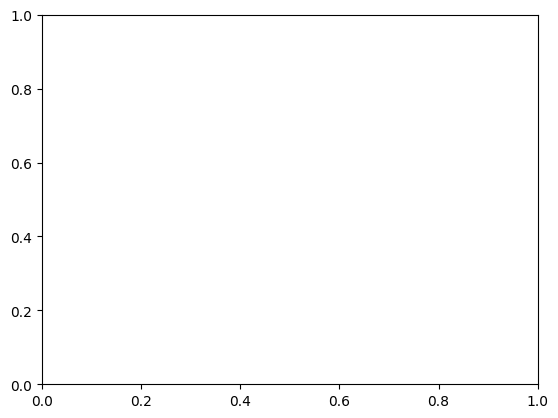

In [45]:
import pandas as pd
import pywt


archivo = pd.read_csv("https://paos.colorado.edu/research/wavelets/wave_idl/sst_nino3.dat", delim_whitespace=True, header=None)
x = np.arange(1,len(archivo)-1)

coef,freq = pywt.cwt(archivo,x,'gaus1')

coef_pot = 10*np.log10(coef)
plt.contour([coef_pot[0],coef_pot[1]],coef_pot[2])


In [44]:
coef

array([[[ 0.08440761],
        [ 0.16881521],
        [ 0.07878043],
        ...,
        [ 0.04501739],
        [ 0.10128913],
        [ 0.03376304]],

       [[ 0.04169877],
        [ 0.08339754],
        [ 0.03891885],
        ...,
        [ 0.02223934],
        [ 0.05003852],
        [ 0.01667951]],

       [[ 0.02427018],
        [ 0.04854037],
        [ 0.02265217],
        ...,
        [ 0.0129441 ],
        [ 0.02912422],
        [ 0.00970807]],

       ...,

       [[-0.        ],
        [-0.        ],
        [-0.        ],
        ...,
        [-0.        ],
        [-0.        ],
        [-0.        ]],

       [[-0.        ],
        [-0.        ],
        [-0.        ],
        ...,
        [-0.        ],
        [-0.        ],
        [-0.        ]],

       [[-0.        ],
        [-0.        ],
        [-0.        ],
        ...,
        [-0.        ],
        [-0.        ],
        [-0.        ]]])

### 3.3 Interpreta los resultados del punto anterior.
<p align="justify">
Debes explicar que significa el gráfico obtenido  en términos del periodo o frecuencia del evento que estamos analizando.


## 4. Referencias
<p align="justify">

https://notebook.community/CSchoel/learn-wavelets/wavelet-introduction

https://www.kaggle.com/code/asauve/a-gentle-introduction-to-wavelet-for-data-analysis

https://pywavelets.readthedocs.io/en/latest/ref/cwt.html

[Análisis espectral para audio] https://ccrma.stanford.edu/~jos/mdft/mdft-python.html

[Cancelación de ruido en datos] https://towardsdatascience.com/noise-cancellation-with-python-and-fourier-transform-97303314aa71

[Convolución en Scipy]https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve.html

[Wavelet transform applications]https://scicoding.com/introduction-to-wavelet-transform-using-python/